In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame from the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable as a separate column
df['target'] = iris.target


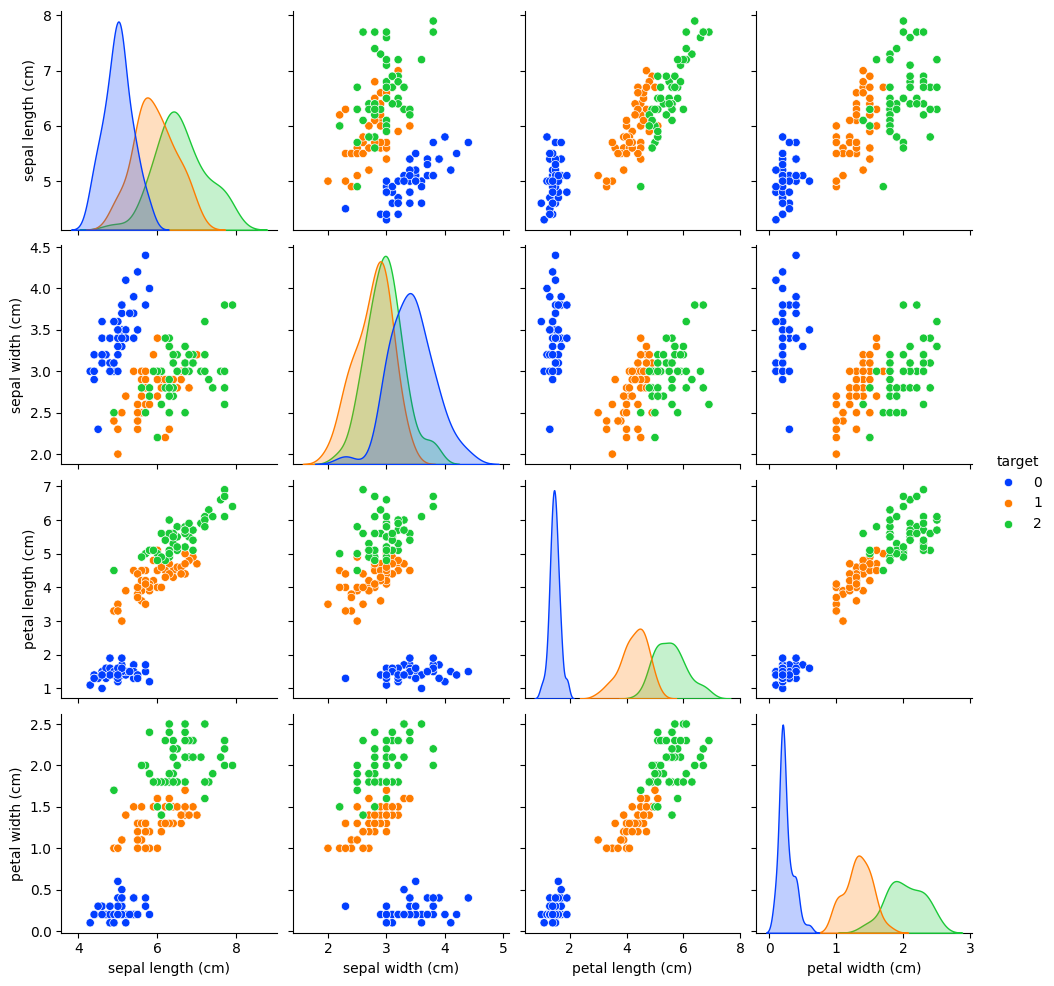

In [3]:
sns.pairplot(df, hue='target', palette='bright')

In [17]:
# Import the voting classifer from sklearn 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, r2_score 

In [7]:
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gnb', GaussianNB())
]

In [10]:
for estimator in estimators:
    score = cross_val_score(estimator[1], df.drop(columns=['target']), df['target'], scoring='accuracy', cv=10)
    print('{}: {:.2f}'.format(estimator[0], score.mean()))

lr: 0.97
rf: 0.97
gnb: 0.95


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

In [14]:
vot_clf = VotingClassifier(estimators=estimators,voting='hard')

In [15]:
scores = cross_val_score(vot_clf,X_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.91


In [20]:
# Fit the data into logistic regression model 

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

y_pred_lr = log_clf.predict(X_test)

# Additional classification metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_lr, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_lr, average="weighted"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_lr, average="weighted"):.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [22]:
# Fit the model 
vot_clf.fit(X_train, y_train)

y_pred_vot = vot_clf.predict(X_test)

In [ ]:
# Additional classification metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred_vot):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_vot, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_vot, average="weighted"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_vot, average="weighted"):.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


**As the dataset is too simple that is why the metric scores are comming out to be 1 which is perfect prediction in ideal cases only**

## Classification In Voting Ensemble 

In [26]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a Pandas DataFrame from the data
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

df['target'] = breast_cancer.target

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gnb', GaussianNB())
]

In [29]:
for estimator in estimators:
    score = cross_val_score(estimator[1], df.drop(columns=['target']), df['target'], scoring='accuracy', cv=10)
    print('{}: {:.2f}'.format(estimator[0], score.mean()))

lr: 0.95
rf: 0.96
gnb: 0.94


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

In [31]:
vot_clf = VotingClassifier(estimators=estimators,voting='hard')

In [32]:
scores = cross_val_score(vot_clf,X_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.82


In [33]:
# We would go with the random forest first

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf, average="weighted"):.4f}')

Accuracy: 0.9649
Precision: 0.9652
Recall: 0.9649
F1-Score: 0.9647


In [34]:
# Make model using the voting classifier 

vot_clf.fit(X_train, y_train)
y_pred_vot = vot_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_vot):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_vot, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_vot, average="weighted"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_vot, average="weighted"):.4f}')

Accuracy: 0.9737
Precision: 0.9748
Recall: 0.9737
F1-Score: 0.9735
